In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian
second_q_op = hamiltonian.second_q_op()
nuc = hamiltonian.nuclear_repulsion_energy


In [2]:
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740

In [3]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
#from qiskit_nature.second_q.mappers import ParityMapper

mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op)

In [4]:
print(qubit_p_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [ ]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC

ansatz = UCC(
    num_spatial_orbitals=2,
    num_particles=[1,1],
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals=2,
        num_particles=[1,1],
        qubit_mapper=mapper,
    ),
    reps=1,

)

In [6]:
print(ansatz.decompose(reps=1))

     ┌───┐┌───────────────────────────────┐┌───────────────────────────────┐»
q_0: ┤ X ├┤0                              ├┤0                              ├»
     └───┘│                               ││                               │»
q_1: ─────┤1                              ├┤1                              ├»
     ┌───┐│  exp(-it (IIXY + IIYX))(t[0]) ││  exp(-it (XYII + YXII))(t[1]) │»
q_2: ┤ X ├┤2                              ├┤2                              ├»
     └───┘│                               ││                               │»
q_3: ─────┤3                              ├┤3                              ├»
          └───────────────────────────────┘└───────────────────────────────┘»
«     ┌─────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                        ├
«     │                                                                         │
«q_1: ┤1                                            

In [7]:
from qiskit import *
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B, SPSA, NELDER_MEAD
from qiskit_algorithms import VQE
#from qiskit.utils import QuantumInstance
from qiskit.primitives import Estimator

optimizer = SLSQP(maxiter=200)

estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_p_op)


In [8]:
print(res)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 72,
    'eigenvalue': -1.8572750215701455,
    'optimal_circuit': <qiskit_nature.second_q.circuit.library.ansatzes.ucc.UCC object at 0x7f0c6607ae90>,
    'optimal_parameters': {   ParameterVectorElement(t[0]): 1.5708113321829569,
                              ParameterVectorElement(t[1]): -4.712308176951076,
                              ParameterVectorElement(t[2]): -4.82419913828879},
    'optimal_point': array([ 1.57081133, -4.71230818, -4.82419914]),
    'optimal_value': -1.8572750215701455,
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x7f0c554391b0>,
    'optimizer_time': 0.7642409801483154}


In [9]:
import numpy as np


# we will iterate over these different optimizers
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    #algorithm_globals.random_seed = 50
    #ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")

    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    res = vqe.compute_minimum_eigenvalue(qubit_p_op)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

Optimizer: SLSQP           

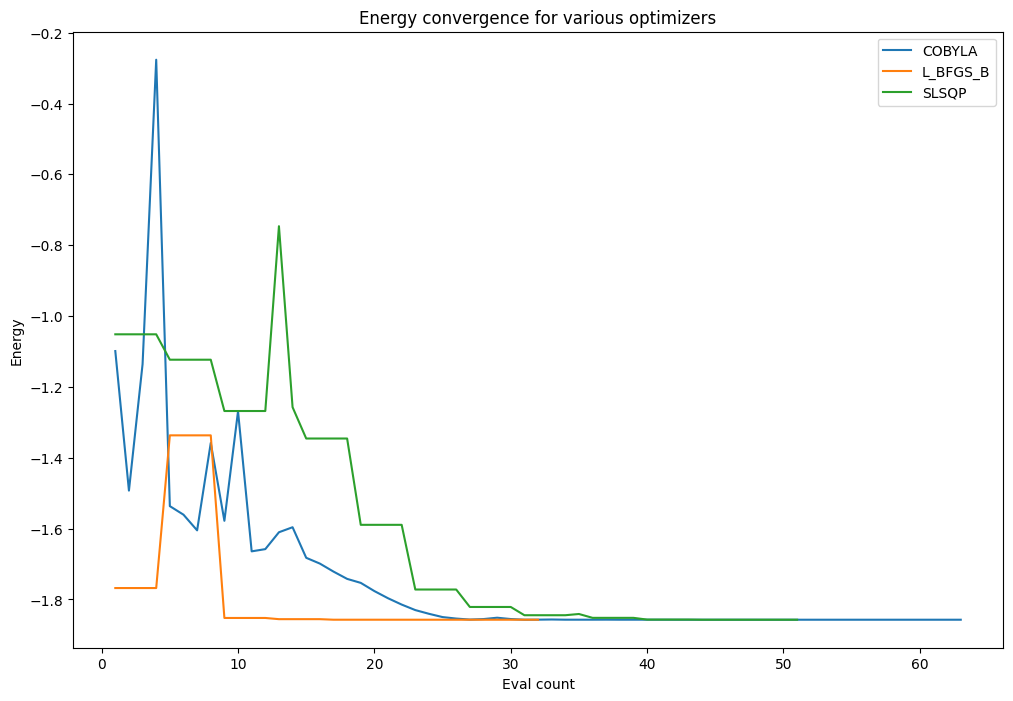

In [10]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right")

In [11]:
from qiskit_algorithms.eigensolvers import NumPyEigensolver

numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
ref_value = exact_result.eigenvalues[0]
print(f"Reference value: {ref_value + nuc }")
print(f"VQE values: {res.optimal_value + nuc}")

Reference value: -1.1373060357533995
VQE values: -1.1373060316158794


In [ ]:
optimal_parameters = res.optimal_parameters
ansatz_circuit = ansatz.assign_parameters(optimal_parameters)

In [13]:
from qiskit import quantum_info
quantum_info.Statevector.from_instruction(ansatz_circuit).data
#qiskit.quantum_info.Statevector.from_instruction(ansatz_circuit).data


array([ 5.41163633e-17-1.01455704e-16j,  5.75543395e-18-7.25702527e-18j,
       -1.38676575e-17-5.88784672e-17j, -2.63178200e-17-1.96261557e-17j,
       -1.43124392e-16-1.54237681e-16j, -9.93755759e-01-1.40535738e-17j,
        3.28328496e-05+6.02732551e-17j,  3.61298063e-17+4.27774463e-18j,
       -9.18867467e-17+7.63899918e-17j, -3.26212222e-05-1.28513972e-16j,
        1.11577280e-01+1.91332687e-17j,  4.03368076e-17-5.02556471e-17j,
        4.92712037e-17-2.47792607e-17j,  3.96703829e-17+5.01537843e-17j,
       -9.32384470e-18+5.60045088e-17j, -2.59697866e-17-2.48810482e-17j])